# Stage 1 - Individual Empowerment 👨🏻‍🎓
Analytical Model to empower individuals to monitor their cardiovascular health at home

<br>

**Goal:**
- obtain important features (personal) for predicting heart attack risk
- the best model that automatically predict heart attack risk based on the important features (>80% accuracy rate) 

**Dataset:**
- heart_pki_2020_encoded.csv

**Models:**
1. Logistic Regression
2. Gradient Boosting Classification

**Logisitic Regression PipeLine:**
1. `Train-test split` -> `SMOTE` (balancing 'HeartDisease' class)
2. Train on train dataset  -> `RFE` (Recursive Feature Elimination, i.e. Backwards Elimination)
3. Final model `evaluation` with test dataset

**Gradient Boosting Classification PipeLine:**
1. `Train-test split` -> `SMOTE` (balancing 'HeartDisease' class)
2. Train on train dataset -> `hypertune parameter` 'learning_rate' and 'n_estimator' -> `Evaluate` each model's accuracy
3. Select model with best accuracy and analyse it with the various metrics

<br>

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" alt="image" width="750" />

<br>
<hr>



## 1. Pre-modelling preparations

- Install dependencies
- Import libraries and dataset
- Train-test split + SMOTE

#### 1.1 Install dependencies, import libraries and dataset

In [118]:
# install dependencies
# Run the following code in your terminal if you don't have the dependecy installed:
    # pip install -U imbalanced-learn --user
    # pip install statsmodels

# Or run in notebook:    
# %pip install -U imbalanced-learn 
# %pip install statsmodels

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# model-related libraries
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
# import personal_key_indicator dataset
# note: dataset is already OneHotEncoded and Integer Encoded in 'data-cleaning-preprocessing.ipynb'
pki_df = pd.read_csv('datasets/heart_pki_2020_encoded.csv')
pki_df

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,5.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0,20.34,0.0,0.0,7.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0,26.58,20.0,30.0,8.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,24.21,0.0,0.0,6.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,23.71,28.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315247,0,22.22,0.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
315248,1,27.41,7.0,0.0,6.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
315249,0,29.84,0.0,0.0,5.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
315250,0,24.24,0.0,0.0,6.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [3]:
pki_df.columns.values

array(['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth',
       'SleepTime', 'Smoking_No', 'Smoking_Yes', 'AlcoholDrinking_No',
       'AlcoholDrinking_Yes', 'Stroke_No', 'Stroke_Yes', 'DiffWalking_No',
       'DiffWalking_Yes', 'Sex_Female', 'Sex_Male', 'AgeCategory_18-24',
       'AgeCategory_25-29', 'AgeCategory_30-34', 'AgeCategory_35-39',
       'AgeCategory_40-44', 'AgeCategory_45-49', 'AgeCategory_50-54',
       'AgeCategory_55-59', 'AgeCategory_60-64', 'AgeCategory_65-69',
       'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'Race_American Indian/Alaskan Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White', 'Diabetic_No', 'Diabetic_No, borderline diabetes',
       'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)',
       'PhysicalActivity_No', 'PhysicalActivity_Yes',
       'GenHealth_Excellent', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good', 'Asthma_No', 'Asthma_

#### 1.2 Train-Test split + SMOTE (Synthetic Minority Oversampling Technique)

**1.2 a) Train-Test spliting of dataset**

In [4]:
X = pki_df.loc[:, pki_df.columns != 'HeartDisease']
y = pki_df.loc[:, pki_df.columns == 'HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**1.2 b) The 'HeartDisease' is unbalanced, so we need to resample it (using SMOTE on trainset)**

Note: only for trainset for RFE (Recursive Feature Elimination)

In [5]:
num_of_HD_Yes = len(pki_df[pki_df['HeartDisease'] == 1])
num_of_HD_No = len(pki_df[pki_df['HeartDisease'] == 0])
num_rows = len(pki_df)

print('Proportion of HeartDisease == 0:', num_of_HD_No/num_rows)
print('Proportion of HeartDisease == 1:', num_of_HD_Yes/num_rows)

Proportion of HeartDisease == 0: 0.9156198850443454
Proportion of HeartDisease == 1: 0.08438011495565452


In [6]:
# Oversampling for trainset to fixed imbalanced 'HeartDisease' class

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

X_train_os, y_train_os = os.fit_resample(X_train, y_train)
X_train_os = pd.DataFrame(data = X_train_os, columns = X_train.columns)
y_train_os = pd.DataFrame(data = y_train_os, columns = y_train.columns)


# check the oversampled data (train)
print("===== Oversampled data =====")

num_of_HD_Yes = len(y_train_os[y_train_os['HeartDisease'] == 1])
num_of_HD_No = len(y_train_os[y_train_os['HeartDisease'] == 0])
num_rows = len(X_train_os)

print("Total number of rows:", num_rows)
print("Number of Heart Disease == 0 rows:", num_of_HD_No)
print("Number of Heart Disease == 1 rows:", num_of_HD_Yes)

print("Proportion of HeartDisease == 0:", num_of_HD_No/num_rows)
print("Proportion of HeartDisease == 1:", num_of_HD_Yes/num_rows)

===== Oversampled data =====
Total number of rows: 404218
Number of Heart Disease == 0 rows: 202109
Number of Heart Disease == 1 rows: 202109
Proportion of HeartDisease == 0: 0.5
Proportion of HeartDisease == 1: 0.5


In [7]:
X_train.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
18662,32.98,0.0,0.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
45050,25.61,0.0,0.0,6.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
191308,16.24,0.0,0.0,7.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
105093,18.30,0.0,0.0,9.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
161942,31.57,5.0,0.0,8.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


<hr>

## 2. Logistic Regression

**Why logistic regression?**
- Depedent variable, `HeartDisease` can be encoded in binary (Yes: 1, No: 1)
- Large dataset of 315252 rows


**References:**
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

#### 2.1 Model Building with Recursive Feature Elimination

- i.e. `Backwards Elimination` until the number of features desired is reached
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
- https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html

> Recursive feature elimination.
> 
> Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 
> - Features are ranked by the model’s coef_ or feature_importances_ attributes, 
> - Recursively eliminating a small number of features (least important) per loop until the **desired number of features to select is eventually reached.**
> - Dependencies and collinearity that may exist in the model are eliminate


> Backwards Elimation (https://www.simplilearn.com/what-is-backward-elimination-technique-in-machine-learning-article):
> - The model includes the initial and all explanatory variables in backward elimination. 
> - Then, the variable with the highest p-value is removed from the model. 
> - This process is repeated until all variables in the model have a p-value below a given threshold.


**2.1 \*) If have access to multiple GPUs and can wait for hours/days for computation"**
- Due to `hardward and computing power constraints`, we will NOT be running the following code.
- Large dataset size & large number of features (50)

What the code does:
- Creating a matrix of RFECV results (1 feature to 50 features) to get the optimal number of features from 1 to 50
- Plot the number of features vs accuracy in a graph

In [46]:
# import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import RFECV

# # Create the RFE object and compute a cross-validated score.
# svc = SVC(kernel="linear")
# # The "accuracy" scoring shows the proportion of correct classifications

# min_features_to_select = 1  # Minimum number of features to consider
# rfecv = RFECV(
#     estimator = svc,
#     step = 1,
#     cv = StratifiedKFold(5),
#     scoring = "accuracy",
#     min_features_to_select = min_features_to_select,
# )
# rfecv.fit(X_train_os, y_train_os.values.ravel())


# print("Optimal number of features : %d" % rfecv.n_features_)
# print(rfecv.get_feature_names_out())


# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (accuracy)")
# plt.plot(
#     range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
#     rfecv.grid_scores_,
# )
# plt.show()

**2.1 a) 1st Model (logreg_m20 -> top 20 features)**

Note: due to no access to GPU, large dataset, and large number of features, we will be conducting RFE to select 20 most important features and branch off from there (+-5 number of features) and compare to find the best model


In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)

def rfeLogistic(X, y, n_features):
    logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)

    rfe = RFE(
        logreg, 
        n_features_to_select=n_features, 
        step=1
    )
    rfe = rfe.fit(X, y.values.ravel())
    return rfe

# Logit (Logistic Regression) summary with p-values and pseudo R-squared
# https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html#statsmodels.discrete.discrete_model.Logit
def logitSummary(X, y, rfe):
    # top features
    pki_df_top_features = rfe.get_feature_names_out()
    
    # summary with p-values and pseudo R-squared
    logit_model = sm.Logit(y, X[pki_df_top_features])
    # logit_model_result = logit_model.fit()
    logit_model_result = logit_model.fit_regularized()

    print(logit_model_result.summary2())

    return (logit_model, logit_model_result)

def fitLogRegModel(X_train, y_train, X_test, y_test, rfe):
    # top features
    pki_df_top_features = rfe.get_feature_names_out()

    # Logistic Regression
    logreg_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)
    logreg_model_result = logreg_model.fit(X_train[pki_df_top_features], y_train.values.ravel())


    print('Train Accuracy: {:.2f}'.format(logreg_model.score(X_train[pki_df_top_features], y_train.values.ravel())))
    print('Test Accuracy: {:.2f}'.format(logreg_model.score(X_test[pki_df_top_features], y_test.values.ravel())))

    return (logreg_model, logreg_model_result);



In [9]:
# recursive feature elimination
rfe_20 = rfeLogistic(X_train_os, y_train_os, 20)

In [10]:
# model summary
print('=== train dataset ===')
(logit_m20, logit_m20_result) = logitSummary(X_train_os, y_train_os, rfe_20)

=== train dataset ===
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.48540594841588053
            Iterations: 111
            Function evaluations: 111
            Gradient evaluations: 111
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.300      
Dependent Variable:    HeartDisease       AIC:                392459.6433
Date:                  2022-10-25 21:57   BIC:                392677.8375
No. Observations:      404218             Log-Likelihood:     -1.9621e+05
Df Model:              19                 LL-Null:            -2.8018e+05
Df Residuals:          404198             LLR p-value:        0.0000     
Converged:             1.0000             Scale:              1.0000     
No. Iterations:        111.0000                                          
-------------------------------------------------------------------------
                         Coef.  Std.Err.     z     P>|

In [11]:
# p-values of variables
logit_m20_result.pvalues

AlcoholDrinking_Yes        5.665612e-159
Stroke_No                   0.000000e+00
Stroke_Yes                 8.930473e-143
Sex_Male                    0.000000e+00
AgeCategory_18-24           0.000000e+00
AgeCategory_25-29           0.000000e+00
AgeCategory_30-34           0.000000e+00
AgeCategory_35-39           0.000000e+00
AgeCategory_40-44           0.000000e+00
AgeCategory_45-49           0.000000e+00
AgeCategory_65-69           0.000000e+00
AgeCategory_70-74           0.000000e+00
AgeCategory_75-79           0.000000e+00
AgeCategory_80 or older     0.000000e+00
Race_Asian                 1.681827e-106
Diabetic_Yes                0.000000e+00
GenHealth_Excellent         0.000000e+00
GenHealth_Fair              0.000000e+00
GenHealth_Poor              0.000000e+00
GenHealth_Very good         0.000000e+00
dtype: float64

In [12]:
# fitting logistic regression model and test accuracy
(logreg_m20, logreg_m20_result) = fitLogRegModel(X_train_os, y_train_os, X_test, y_test, rfe_20)

Train Accuracy: 0.77
Test Accuracy: 0.73


Conclusion (logreg_m20):
- pseduo r-squared is 0.3, which is between 0.2 and 0.4, indicating excellent fit
- p-values of all 20 important variables are close to 0, signifying that they are all statistically significant
- train and test accuracy quite high at 0.77 and 0.73 respectively

<br>

Let's see if increasing the number of features will increase our testset accuracy

**2.1 b) 2nd Model (logreg_m25 -> top 25 features)**

In [13]:
# recursive feature elimination
rfe_25 = rfeLogistic(X_train_os, y_train_os, 25)

In [14]:
# model summary
print('=== train dataset ===')
(logit_m25, logit_m25_result) = logitSummary(X_train_os, y_train_os, rfe_25)

=== train dataset ===
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.47868435426391026
            Iterations: 112
            Function evaluations: 112
            Gradient evaluations: 112
                                   Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.309      
Dependent Variable:       HeartDisease           AIC:                    387035.6646
Date:                     2022-10-25 21:58       BIC:                    387308.4074
No. Observations:         404218                 Log-Likelihood:         -1.9349e+05
Df Model:                 24                     LL-Null:                -2.8018e+05
Df Residuals:             404193                 LLR p-value:            0.0000     
Converged:                1.0000                 Scale:                  1.0000     
No. Iterations:           112.0000                                                  
----------------------------------

In [15]:
# p-values of variables
logit_m25_result.pvalues

Smoking_No                  0.000000e+00
AlcoholDrinking_Yes        9.172218e-220
Stroke_No                   9.999967e-01
Stroke_Yes                  9.999956e-01
Sex_Female                  9.999970e-01
Sex_Male                    9.999978e-01
AgeCategory_18-24           0.000000e+00
AgeCategory_25-29           0.000000e+00
AgeCategory_30-34           0.000000e+00
AgeCategory_35-39           0.000000e+00
AgeCategory_40-44           0.000000e+00
AgeCategory_45-49          2.631790e-208
AgeCategory_60-64          1.000632e-190
AgeCategory_65-69           0.000000e+00
AgeCategory_70-74           0.000000e+00
AgeCategory_75-79           0.000000e+00
AgeCategory_80 or older     0.000000e+00
Race_Asian                  3.097206e-28
Race_White                 1.504186e-242
Diabetic_Yes                0.000000e+00
GenHealth_Excellent         0.000000e+00
GenHealth_Fair              0.000000e+00
GenHealth_Poor              0.000000e+00
GenHealth_Very good         0.000000e+00
KidneyDisease_Ye

In [16]:
# fitting logistic regression model and test accuracy
(logreg_m25, logreg_m25_result) = fitLogRegModel(X_train_os, y_train_os, X_test, y_test, rfe_25)

Train Accuracy: 0.77
Test Accuracy: 0.75


Conclusion (logreg_m25):
- pseduo r-squared is 0.309, which is between 0.2 and 0.4, indicating excellent fit
- train and test accuracy quite high at 0.77 and 0.75 respectively, which is `better` than logreg_m20's test accuracy
- `however`, the p-values of 4 variables are close to 1 (Stroke_No, Stroke_Yes, Sex_Female, Sex_Male), signifying that they are all not statistically significant


<br>

Let's see if decreasing the number of features by 4 will remove this statitisically insignificant variables

**2.1 c) 3rd Model (logreg_m21 -> top 21 features)**

In [17]:
# recursive feature elimination
rfe_21 = rfeLogistic(X_train_os, y_train_os, 21)

In [18]:
# model summary
print('=== train dataset ===')
(logit_m21, logit_m21_result) = logitSummary(X_train_os, y_train_os, rfe_21)

=== train dataset ===
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4841614871374755
            Iterations: 118
            Function evaluations: 118
            Gradient evaluations: 118
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.302      
Dependent Variable:    HeartDisease       AIC:                391455.5760
Date:                  2022-10-25 22:01   BIC:                391684.6799
No. Observations:      404218             Log-Likelihood:     -1.9571e+05
Df Model:              20                 LL-Null:            -2.8018e+05
Df Residuals:          404197             LLR p-value:        0.0000     
Converged:             1.0000             Scale:              1.0000     
No. Iterations:        118.0000                                          
-------------------------------------------------------------------------
                         Coef.  Std.Err.     z     P>|z

In [19]:
# p-values of variables
logit_m21_result.pvalues

AlcoholDrinking_Yes        4.982480e-154
Stroke_No                   0.000000e+00
Stroke_Yes                  1.702987e-49
Sex_Male                    0.000000e+00
AgeCategory_18-24           0.000000e+00
AgeCategory_25-29           0.000000e+00
AgeCategory_30-34           0.000000e+00
AgeCategory_35-39           0.000000e+00
AgeCategory_40-44           0.000000e+00
AgeCategory_45-49          9.031435e-228
AgeCategory_60-64          6.379376e-220
AgeCategory_65-69           0.000000e+00
AgeCategory_70-74           0.000000e+00
AgeCategory_75-79           0.000000e+00
AgeCategory_80 or older     0.000000e+00
Race_Asian                 1.492917e-103
Diabetic_Yes                0.000000e+00
GenHealth_Excellent         0.000000e+00
GenHealth_Fair              0.000000e+00
GenHealth_Poor              0.000000e+00
GenHealth_Very good         0.000000e+00
dtype: float64

In [20]:
# fitting logistic regression model and test accuracy
(logreg_m21, logreg_m21_result) = fitLogRegModel(X_train_os, y_train_os, X_test, y_test, rfe_21)

Train Accuracy: 0.77
Test Accuracy: 0.74


Conclusion (logreg_m21):
- pseduo r-squared is 0.302, which is between 0.2 and 0.4, indicating excellent fit
- p-values of all 20 important variables are close to 0, signifying that they are all statistically significant (`better` than logreg_m25)
- train and test accuracy quite high at 0.77 and 0.74 respectively, which is `better` than logreg_m20's test accuracy


<br>

This model appears the best :)

#### 2.2 Model Evaluation

- Confusion Matrix, with TPR, TNR, FPR, FNR
- Precision, recall, F1-score and support
- ROC Curve


> The `precision` is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
> 
> The `recall` is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
> 
> The `F1-score` can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
> 
> The `support` is the number of occurrences of each class in y_test.

In [21]:
# Confusion Metrics
from sklearn.metrics import confusion_matrix

def computeConfusionMatrix(y_test, y_test_pred):
    print(confusion_matrix(y_test, y_test_pred))

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print()
    CM1 = metrics.confusion_matrix(y_test, y_test_pred)
    TN1 = CM1[0][0]
    FN1 = CM1[1][0]
    TP1 = CM1[1][1]
    FP1 = CM1[0][1]

    TPR1 = TP1 / (TP1 + FN1)
    TNR1 = TN1 / (TN1 + FP1)
    FPR1 = FP1/(TN1+FP1)
    FNR1 = FN1/(TP1+FN1)

    print("The True Positive Rate is\t", TPR1)
    print("The True Negative Rate is\t", TNR1)
    print("False Postive Rate:\t", FPR1)
    print("False Negative Rate\t:", FNR1)
    print()

    # Plot the Confusion Matrix for Train and Test
    plt.figure(figsize=(12, 4))
    sb.heatmap(CM1, annot = True, fmt=".0f", 
               annot_kws={"size": 18})


# Precision, Recall, F1-score and Support
from sklearn.metrics import classification_report

def computeClassificationReport(y_test, y_pred):
    print(classification_report(y_test, y_pred))


# ROC Curve
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def computeROCCurve(model, X_test, y_test, title):    
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label=title+' (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    plt.show()

**2.2 a) Confusion Matrix**

===== logreg_m20 =====
[[62392 24150]
 [ 1748  6286]]
Goodness of Fit of Model 	Test Dataset

The True Positive Rate is	 0.7824246950460543
The True Negative Rate is	 0.7209447435927064
False Postive Rate:	 0.27905525640729356
False Negative Rate	: 0.21757530495394573



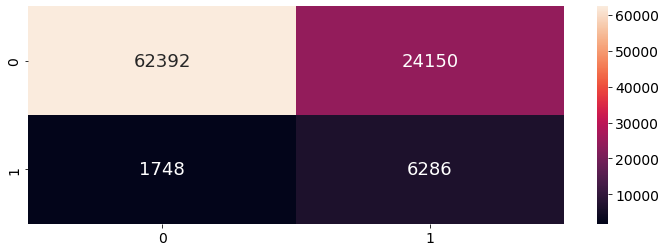

In [22]:
# 1st model
print('===== logreg_m20 =====')
computeConfusionMatrix(y_test, logreg_m20.predict(X_test[rfe_20.get_feature_names_out()]))


===== logreg_m25 =====
[[64744 21798]
 [ 1865  6169]]
Goodness of Fit of Model 	Test Dataset

The True Positive Rate is	 0.7678615882499378
The True Negative Rate is	 0.7481222989993298
False Postive Rate:	 0.2518777010006702
False Negative Rate	: 0.23213841175006222



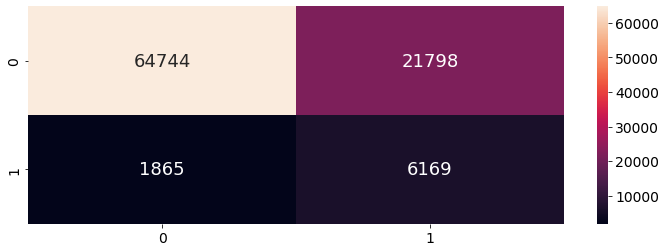

In [23]:
# 2nd model
print('\n===== logreg_m25 =====')
computeConfusionMatrix(y_test, logreg_m25.predict(X_test[rfe_25.get_feature_names_out()]))


===== logreg_m21 =====
[[64034 22508]
 [ 1851  6183]]
Goodness of Fit of Model 	Test Dataset

The True Positive Rate is	 0.7696041822255415
The True Negative Rate is	 0.7399181900117862
False Postive Rate:	 0.26008180998821384
False Negative Rate	: 0.23039581777445856



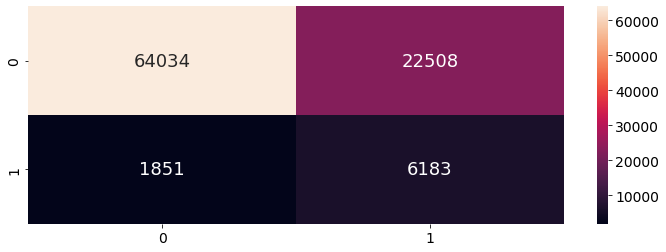

In [24]:

# 3rd model
print('\n===== logreg_m21 =====')
computeConfusionMatrix(y_test, logreg_m21.predict(X_test[rfe_21.get_feature_names_out()]))

Interpretation:
- `logreg_20`: 68678 correct predictions and 25898 incorrect predictions -> 72.62% accuracy
- `logreg_25`: 70913 correct predictions and 23663 incorrect predictions -> 74.98% accuracy
- `logreg_21`: 70217 correct predictions and 24359 incorrect predictions -> 74.24% accuracy

> The accuracy is quite good! Especially for `logreg_21` and `logreg_25`!

<br>

We can explore more in depth about this confusion matrix by calculating the precision, recall, and f1-score

**2.2 b) Precision, Recall, F1-score and Support**

In [25]:
# 1st model
print('===== logreg_m20 =====')
computeClassificationReport(y_test, logreg_m20.predict(X_test[rfe_20.get_feature_names_out()]))

===== logreg_m20 =====
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     86542
           1       0.21      0.78      0.33      8034

    accuracy                           0.73     94576
   macro avg       0.59      0.75      0.58     94576
weighted avg       0.91      0.73      0.79     94576



In [26]:
# 2nd model
print('\n===== logreg_m25 =====')
computeClassificationReport(y_test, logreg_m25.predict(X_test[rfe_25.get_feature_names_out()]))


===== logreg_m25 =====
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     86542
           1       0.22      0.77      0.34      8034

    accuracy                           0.75     94576
   macro avg       0.60      0.76      0.59     94576
weighted avg       0.91      0.75      0.80     94576



In [27]:
# 3rd model
print('\n===== logreg_m21 =====')
computeClassificationReport(y_test, logreg_m21.predict(X_test[rfe_21.get_feature_names_out()]))


===== logreg_m21 =====
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     86542
           1       0.22      0.77      0.34      8034

    accuracy                           0.74     94576
   macro avg       0.59      0.75      0.59     94576
weighted avg       0.91      0.74      0.80     94576



Interpretation:
- For `all models`, the weighted avg of precision and recall are good. The f1-score is also `very good` (around 0.8), which shows that the model performs well.

**2.2 c) ROC Curve**
- Receiver operating characteristic (ROC) curve
- The dotted line represents the ROC curve of a purely random classifier
- A good classifier stays as far away from that line as possible (toward the top-left corner).

===== logreg_m20 =====


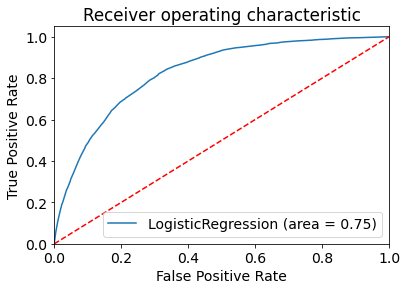


===== logreg_m25 =====


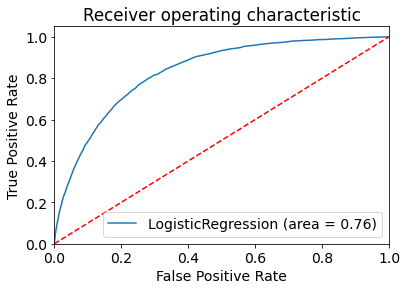


===== logreg_m21 =====


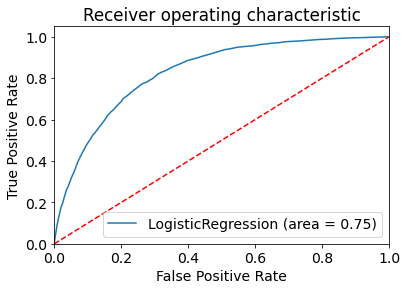

In [28]:
# 1st model
print('===== logreg_m20 =====')
computeROCCurve(logreg_m20, X_test[rfe_20.get_feature_names_out()], y_test, title="LogisticRegression")
# 2nd model
print('\n===== logreg_m25 =====')
computeROCCurve(logreg_m25, X_test[rfe_25.get_feature_names_out()], y_test, title="LogisticRegression")
# 3rd model
print('\n===== logreg_m21 =====')
computeROCCurve(logreg_m21, X_test[rfe_21.get_feature_names_out()], y_test, title="LogisticRegression")

Interpretation:
- The ROC AUC score is quite good (~0.75), which indicates that all the 3 models are good classifier for the dataset
- The best ROC AUC score belongs to logreg_m25, which contains 25 features, but 4 of them have statistically insignificant variables
- The model logreg_m21 has a ROC AUC score of 0.75 which is almost the same to that of logreg_25, even though it has less variables.
- Taking the model complexity into account, `logreg_m21` is the better model of the 3

#### 2.3 Logistic Regression Conclusion

**2.3 a) The logistic regression model, `logreg_m21` is the best model!**
- High accuracy performance on test dataset (74.98%) with relatively lesser number of features (21) compared to the other 2 models (logreg_20 & log_reg_25)
- Very good f1-score of 0.8 (similar to the other 2 models)
- Good ROC AUC score of 0.75 (similar to the other 2 models)

<br>

**2.3 b) NOTE: It can be observed that these 3 models only slightly differ in their performance.**
- This is because we did Recursive Feature Elimination from 50 features to 20/21/25 features
- So what we did here was to further fine-tune and determine the optimal number of features given our hardward constraints (no GPU)

<br>

**2.3 c) Important Features:**

In [32]:
print(rfe_21.get_feature_names_out())

['AlcoholDrinking_Yes' 'Stroke_No' 'Stroke_Yes' 'Sex_Male'
 'AgeCategory_18-24' 'AgeCategory_25-29' 'AgeCategory_30-34'
 'AgeCategory_35-39' 'AgeCategory_40-44' 'AgeCategory_45-49'
 'AgeCategory_60-64' 'AgeCategory_65-69' 'AgeCategory_70-74'
 'AgeCategory_75-79' 'AgeCategory_80 or older' 'Race_Asian' 'Diabetic_Yes'
 'GenHealth_Excellent' 'GenHealth_Fair' 'GenHealth_Poor'
 'GenHealth_Very good']


The 6 important features are:
- `AlcoholDrinking`
- `Stroke`
- `AgeCategory`
- `Race`
- `Diabetic`
- `GenHealth`

**2.3 d) How can individuals use this model?**

**Individuals can user the following 6 questions by themselves:**

- `AlcoholDrinking` -> Have more than 7 drinks per week?
  - True/False
- `Stroke` -> (Ever told) (you had) a stroke?
  - True/False
- `AgeCategory` -> What is your age range?
  - 13 unique levels age category
  - '18-24'
  - '25-29'
  - '30-34'
  - '35-39'
  - '40-44'
  - '45-49'
  - '50-54'
  - '55-59'
  - '60-64'
  - '65-69'
  - '70-74'
  - '75-79'
  - '80 or older'
- `Race` -> Imputed race/ethnicity value?
  - 6 unique different races
  - 'Race_American Indian/Alaskan Native'
  - 'Race_Asian'
  - 'Race_Black'
  - 'Race_Hispanic'
  - 'Race_Other'
  - 'Race_White'
- `Diabetic` -> (Ever told) (you had) diabetes?
  - 'Diabetic_No'
  - 'Diabetic_No, borderline diabetes'
  - 'Diabetic_Yes'
  - 'Diabetic_Yes (during pregnancy)'
- `GenHealth` -> Would you say that in general your health is...
  - 'GenHealth_Excellent'
  - 'GenHealth_Very good'
  - 'GenHealth_Good'
  - 'GenHealth_Fair'
  - 'GenHealth_Poor'

In [33]:
# asumming this this a individual's answers (after OneHotEncoding)
userAnswers = pd.DataFrame(X_train.loc[1, rfe_21.get_feature_names_out()]).T

userResult = "DANGER! You will have a heart attack soon!" if logreg_m21.predict(userAnswers)[0] else "You are safe :)"

print(userResult)


DANGER! You will have a heart attack soon!


**2.3 e) Assumptions Made**
- Individuals answer the 6 questions truthfully and correctly
- Independence of errors
- Absence of multicollinearity
- Lack of strongly influential outliers.

#### 2.4 Export regression model (logreg_m21)

**2.4 a) Export**

In [34]:
# Save Model Using joblib
import joblib

# save the models to disk
filename = 'models/stage1_logreg_rfe_21.sav'
joblib.dump(rfe_21, filename)

filename = 'models/stage1_logreg_21.sav'
joblib.dump(logreg_m21, filename)

['models/stage1_logreg_21.sav']

**2.4 b) Steps to import model**

In [35]:
# some time later...
 
# load the model from disk
loaded_model_rfe_21 = joblib.load('models/stage1_logreg_rfe_21.sav')
loaded_model_logreg_21 = joblib.load('models/stage1_logreg_21.sav')
result = loaded_model_logreg_21.score(X_test[loaded_model_rfe_21.get_feature_names_out()], y_test)
print(result)

0.7424399424801218


## 3. Gradient Boosting Classifier

**What is it?**
- Iteratively learn from each of the weak learners to build a strong model
- 3 main components:
  1. **Loss Function** 
       - estimate how good the model is at making predictions with the given data
  2. **Weak Learner** 
       - one that classifies our data but does so poorly (i.e. high error rate)
  4. **Additive Model** 
       - Iterative and sequential approach of adding the trees (weak learners) one step at a time. Each iteration should reduce the value of our loss function. After each iteration, we need to be closer to our final model.

**Why Gradient Boosting Classifier?**
- To get a better accuracy compared to logistic regression


**References**
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- https://blog.paperspace.com/gradient-boosting-for-classification/
- https://medium.com/geekculture/finding-the-important-features-of-a-feature-set-a-classification-task-with-sklearns-algorithms-3003f740faf9
- https://www.kaggle.com/code/ericbae731/feature-importance-of-gradient-boosting-simple/notebook



#### 3.1 Model Building + Hyperparameter Tuning
https://blog.paperspace.com/gradient-boosting-for-classification/

Parameters:
- `n_estimators` : The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting, so a large number usually results in a better performance.
- `learning_rate` : learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
- `max_features` : The number of features to consider when looking for the best split.
- `max_depth` : maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
- `random_state` : random_state is the seed used by the random number generator.

<br>

We will conduct hyperparameter tuning on these 2 parameters, `n_estimators` and `learning_rate`, to obtain the best parameters for the model to perform well.


In [52]:
from sklearn.metrics import confusion_matrix

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
n_estimators = [10, 20, 50, 75, 100]

# learning rates + n_estimators
testResultMatrix_GBC = []

for learning_rate in learning_rates:
    curTestResult = []
    for n_estimator in n_estimators:
        gb = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
        gb.fit(X_train_os, y_train_os.values.ravel())

        # Accuracy
        curTestResult.append(gb.score(X_test, y_test))

        # print("Learning rate: ", learning_rate)
        # print("n_estimator: ", n_estimator)
        # print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_os, y_train_os)))
        # print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))

    testResultMatrix_GBC.append(curTestResult)

In [53]:
print(testResultMatrix_GBC)

[[0.742207325325664, 0.773980713923194, 0.8107659448485873, 0.8148261715445779, 0.8105439012011504], [0.7428205887328709, 0.7880646252749112, 0.8024234478091693, 0.8052677211977669, 0.8053100152258501], [0.7861085264760616, 0.7950114193875825, 0.8155240230079512, 0.8218469802063949, 0.8287937743190662], [0.7831902385383184, 0.8050139570292675, 0.8247335476230756, 0.8444848587379462, 0.8526793266790729], [0.7859922178988327, 0.8212231432921672, 0.8412387920825579, 0.8532820165792591, 0.8650397563863983], [0.7708615293520555, 0.8181568262561326, 0.8497187447132465, 0.8654838436812722, 0.8754229402808323]]


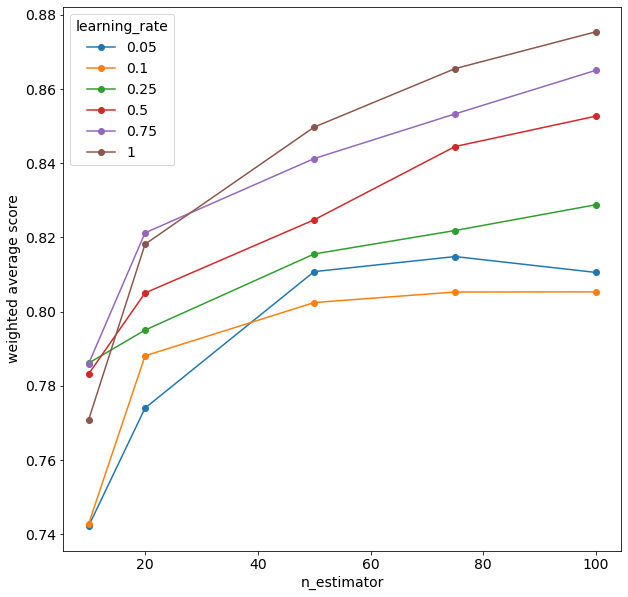

In [54]:
plt.figure(figsize=(10,10))


for i, learning_rate in enumerate(learning_rates):
    # n_estimators
    resultRow = testResultMatrix_GBC[i]

    plt.plot(
        n_estimators, 
        resultRow, 
        label = learning_rate, 
        marker = 'o')
plt.legend(title="learning_rate")
plt.xlabel("n_estimator")
plt.ylabel("weighted average score")
plt.show()

**Conclusion:**
- The best value of `learning_rate` and `n_estimator` combination is (1, 100)

#### 3.2 Fit and Evaluate model with best hyperparameters (learning_rate and n_estimator)

**3.2 a) Model Fitting with best hyperparameters**
- n_estimators = `100`
- learning_rate = `1`
- max_features = 2
- max_depth = 2
- random_state = 0

In [55]:
gbc_m1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_features=2, max_depth=2, random_state=0)
gbc_m1.fit(X_train_os, y_train_os.values.ravel())

GradientBoostingClassifier(learning_rate=1, max_depth=2, max_features=2,
                           random_state=0)

**3.2 b) Model evaludation**
- True Positive Rate, True Negative Rate, False Positive Rate, False Negative Rate, Confusion Matrix
- Precision, recall, F1-score and support
- ROC Curve

In [56]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

def printGBCConfusionMatrix(gbc, y_train_os_pred, y_test_pred):
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", gbc.score(X_train_os, y_train_os))
    CM1 = confusion_matrix(y_train_os, y_train_os_pred)
    TN1 = CM1[0][0]
    FN1 = CM1[1][0]
    TP1 = CM1[1][1]
    FP1 = CM1[0][1]
    TPR1 = TP1 / (TP1 + FN1)
    TNR1 = TN1 / (TN1 + FP1)
    FPR1 = FP1/(TN1+FP1)
    FNR1 = FN1/(TP1+FN1)
    print("True Positive Rate:\t", TPR1)
    print("True Negative Rate:\t", TNR1)
    print("False Postive Rate:\t", FPR1)
    print("False Negative Rate:\t", FNR1)
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", gbc.score(X_test, y_test))
    print()
    CM2 = metrics.confusion_matrix(y_test, y_test_pred)
    TN2 = CM2[0][0]
    FN2 = CM2[1][0]
    TP2 = CM2[1][1]
    FP2 = CM2[0][1]
    TPR2 = TP2 / (TP2 + FN2)
    TNR2 = TN2 / (TN2 + FP2)
    FPR2 = FP2/(TN2+FP2)
    FNR2 = FN2/(TP2+FN2)
    print("The True Positive Rate is\t", TPR2)
    print("The True Negative Rate is\t", TNR2)
    print("False Postive Rate:\t", FPR2)
    print("False Negative Rate:\t", FNR2)
    print()

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(CM1, annot = True, fmt=".0f", 
               annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(CM2, annot = True, fmt=".0f", 
               annot_kws={"size": 18}, ax = axes[1])


# Precision, Recall, F1-score and Support
from sklearn.metrics import classification_report

def computeClassificationReport(y_test, y_pred):
    print(classification_report(y_test, y_pred))


# ROC Curve
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def computeROCCurve(model, X_test, y_test, title):    
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label=title+' (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    plt.show()

**Confusion Matrix**

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9080694080916734
True Positive Rate:	 0.8863731946622861
True Negative Rate:	 0.9297656215210605
False Postive Rate:	 0.07023437847893958
False Negative Rate:	 0.11362680533771381

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8754229402808323

The True Positive Rate is	 0.3084391336818521
The True Negative Rate is	 0.9280580527373992
False Postive Rate:	 0.07194194726260082
False Negative Rate:	 0.6915608663181478



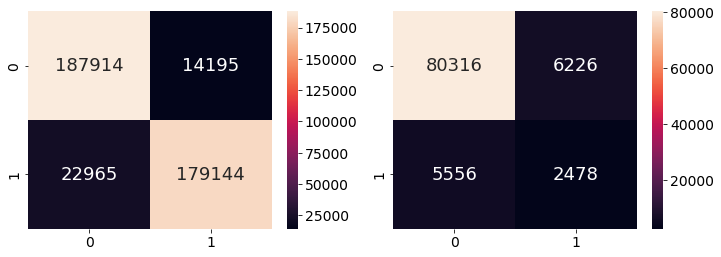

In [57]:
# Confusion Matrix
y_train_os_pred = gbc_m1.predict(X_train_os)
y_test_pred = gbc_m1.predict(X_test)
printGBCConfusionMatrix(gbc_m1, y_train_os_pred, y_test_pred)

- High true positive and true negative rate for both train and test dataset
- `High classification accuracy` on test dataset (87.54%)

**Precision, Recall, F1-score and Support**

In [58]:
computeClassificationReport(y_test, gbc_m1.predict(X_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     86542
           1       0.28      0.31      0.30      8034

    accuracy                           0.88     94576
   macro avg       0.61      0.62      0.61     94576
weighted avg       0.88      0.88      0.88     94576



- `Excellent` weighted average for precision, recall, and f1-score, which shows that the model performs well (even better than logistic regression)

**ROC Curve**

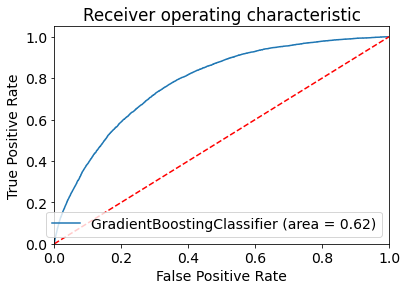

In [59]:
computeROCCurve(gbc_m1, X_test, y_test, "GradientBoostingClassifier")

- ROC AUC score of 0.62, which is quite decent although it is `worse` than that of Logistic Regression's

#### 3.3 Comparison with Logistic Regression

`Gradient Boosting Classifier model` is `better` than the best Logistic Regression model
- There is a significant boost in the test dataset prediction performance from 74% to `87.54%`
- Higher f-score

<br>

Therefore, we will use GradientBoostingClassifier model!

#### 3.4 Feature Importance

Get the top 20 features and compare the base features with that of logistic regression's top features

- https://www.kaggle.com/code/ericbae731/feature-importance-of-gradient-boosting-simple/notebook
- https://medium.com/geekculture/finding-the-important-features-of-a-feature-set-a-classification-task-with-sklearns-algorithms-3003f740faf9

**3.4 a) GBC Feature importance**

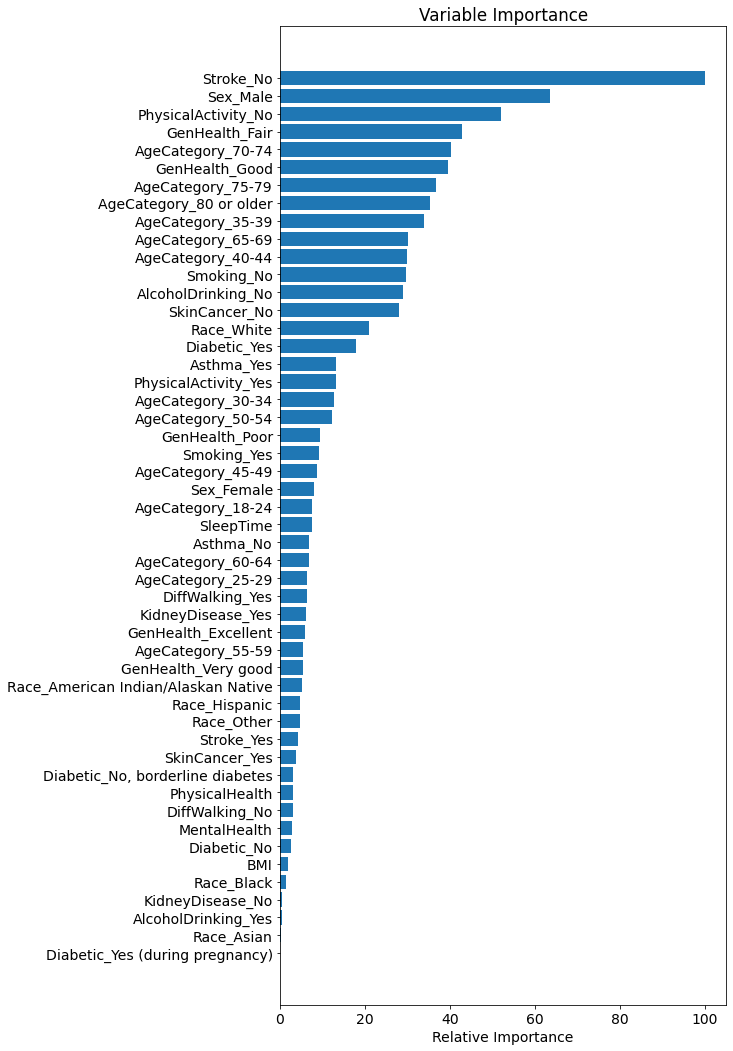

In [60]:
# Reference: https://www.kaggle.com/code/ericbae731/feature-importance-of-gradient-boosting-simple/notebook
# Plot feature importance https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
feature_importance = gbc_m1.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [61]:
# reference: https://medium.com/geekculture/finding-the-important-features-of-a-feature-set-a-classification-task-with-sklearns-algorithms-3003f740faf9
# get top 20 features
imp_features = gbc_m1.feature_importances_

df_imp_features = pd.DataFrame({"features":X_train.keys()}).join(pd.DataFrame({"weights":imp_features}))
df_imp_features.sort_values(by=['weights'], ascending=False, inplace=True)
df_imp_features.head(20)

,features,weights
8,Stroke_No,0.121616
13,Sex_Male,0.077216
37,PhysicalActivity_No,0.063189
40,GenHealth_Fair,0.052195
24,AgeCategory_70-74,0.048813
41,GenHealth_Good,0.048213
25,AgeCategory_75-79,0.044708
26,AgeCategory_80 or older,0.042845
17,AgeCategory_35-39,0.041104
23,AgeCategory_65-69,0.036580


In [62]:
print(df_imp_features.head(20)['features'].tolist())

['Stroke_No', 'Sex_Male', 'PhysicalActivity_No', 'GenHealth_Fair', 'AgeCategory_70-74', 'GenHealth_Good', 'AgeCategory_75-79', 'AgeCategory_80 or older', 'AgeCategory_35-39', 'AgeCategory_65-69', 'AgeCategory_40-44', 'Smoking_No', 'AlcoholDrinking_No', 'SkinCancer_No', 'Race_White', 'Diabetic_Yes', 'Asthma_Yes', 'PhysicalActivity_Yes', 'AgeCategory_30-34', 'AgeCategory_50-54']


Top 11 important features are:
- `Stroke`
- Sex
- PhysicalActivity
- GenHealth
- AgeCategory
- Smoking
- AlcoholDrinking
- SkinCancer
- Race
- Diabetic
- Asthma

According to the feature importance weights, `Stroke` is an `extremely feature` as it has the greatest weight value of 0.12 which is significantly more than the other features' weight value

**3.4 b) Comparing top features with logistic regression's**

The 6 important features from Logistic Regression are:
- AlcoholDrinking
- Stroke
- AgeCategory
- Race
- Diabetic
- GenHealth

<br>

**All of the 6 features included** in Logistic Regression are included in the Gradient Boosting Classifier! Hence, we can include all the 6 questions we have previously written for users to follow, and add on 6 more questions pertaining to 'Sex', 'PhysicalActivity', 'Smoking', 'SkinCancer', and 'Asthma'.

#### 3.5 Export Gradient Boosting Classifier (gbc_m1)

**3.5 a) Export**


In [63]:
# Save Model Using joblib
import joblib

# save the models to disk
filename = 'models/stage1_gbc_m1.sav'
joblib.dump(gbc_m1, filename)


['models/stage1_gbc_m1.sav']

**3.5 b) How to Import:**

In [64]:
# some time later...
 
# load the model from disk
loaded_gbc_m1 = joblib.load('models/stage1_gbc_m1.sav')
result = loaded_gbc_m1.score(X_test, y_test)
print(result)

0.8754229402808323


<hr>

## 4. Stage 1 Conclusion

- `Gradient Boosting Classifier` (gcb_m1) perform better than logistic regression (87.54% vs 74%)
- Top features from logistic regression supports and evidence that the **top features in GBC is valid and reliable**

<br>

Top **11 important features** are:
- `Stroke`
- Sex
- PhysicalActivity
- GenHealth
- AgeCategory
- Smoking
- AlcoholDrinking
- SkinCancer
- Race
- Diabetic
- Asthma

We also found that `Stroke` is an `extremely feature` in predicting cardiovascular disease.

Therefore, users can answer questions with respect to the 11 features listed above to gain insight to their cardiovascular health.

In [66]:
pd.DataFrame([gbc_m1.score(X_test, y_test), logreg_m21.score(X_test[rfe_21.get_feature_names_out()], y_test)], columns=["Analytic Model"], index=["Gradient Boosting Classifier","Logistic Regression"])


,Analytic Model
Gradient Boosting Classifier,0.875423
Logistic Regression,0.742440


In [67]:
# Sample

# asumming this this a individual's answers (after OneHotEncoding)
userAnswers = pd.DataFrame(X_train.loc[7,]).T

userResult = "DANGER! You will have a heart attack soon!" if gbc_m1.predict(userAnswers)[0] else "You are safe :)"

print(userResult)

DANGER! You will have a heart attack soon!


<hr>

### At risk? On To Stage 2! 🚴🏻‍♀️🚴🏻